# Dataset 　　　

In [ ]:
'''
1.原X欄位的各鄉鎮市區onehot_encoding欄位與房廳衛欄位有標準化,交易(完成)年未刪除。本例重新整理資料,並以def處理各鄉鎮市區的model
2.資料數不夠多,除了train data, test data, 用full data先做做看
3.本例ML已可得到良好的精準度, MLP方法可省略(using Keras framework)
4.建立def MLP_model(), 隨時以def參數處理分層數或分批數等,各種algoritm都可結合Kfold驗證

'''

In [71]:
import pandas as pd

df_ml = pd.read_csv('./tw_house.csv', encoding='big5') #同一個PATH可略去./,  可先調整欄位使用的重要性或依型式由左至右排列
df_ml  #machine learning

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積平方公尺,單價每平方公尺,車位總價元,總價元,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,...,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,大同區,6.34,55.19,0.00,233738,0,1290.0000,1,1,1,...,0,0,0,0,0,1,0,0,0,0
1,內湖區,4.96,38.79,0.00,110853,0,430.0000,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,內湖區,13.72,149.24,12.96,160815,0,2400.0000,3,2,2,...,0,1,0,0,0,0,0,0,0,0
3,內湖區,22.45,136.20,34.60,149046,0,2030.0000,3,2,1,...,0,1,0,0,0,0,0,0,0,0
4,內湖區,33.51,242.78,51.07,197216,0,4788.0000,5,2,2,...,0,1,0,0,0,0,0,0,0,0
5,內湖區,15.12,47.74,0.00,257227,0,1228.0000,2,2,2,...,0,1,0,0,0,0,0,0,0,0
6,內湖區,27.44,115.29,0.00,119698,0,1380.0000,4,2,2,...,0,1,0,0,0,0,0,0,0,0
7,內湖區,16.90,133.73,0.00,160772,0,2150.0000,3,1,2,...,0,1,0,0,0,0,0,0,0,0
8,內湖區,23.43,142.73,37.71,167309,0,2388.0000,2,1,2,...,0,1,0,0,0,0,0,0,0,0
9,內湖區,28.03,170.77,38.00,161035,0,2750.0000,3,1,2,...,0,1,0,0,0,0,0,0,0,0


In [72]:
df_ml.sample(5)  #隨機選取其中5筆資料

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積平方公尺,單價每平方公尺,車位總價元,總價元,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,...,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
50,大同區,33.05,107.83,0.00,92739,0,1000.0,3,2,2,...,0,0,0,0,0,1,0,0,0,0
534,士林區,33.73,118.16,0.00,120007,0,1418.0,3,2,2,...,0,0,0,0,1,0,0,0,0,0
220,信義區,38.05,118.94,0.00,100891,0,1200.0,2,2,1,...,1,0,0,0,0,0,0,0,0,0
115,北投區,175.73,362.35,105.63,208359,8100000,6159.0,3,2,3,...,0,0,1,0,0,0,0,0,0,0
35,內湖區,31.86,242.97,41.58,121826,0,2960.0,4,2,2,...,0,1,0,0,0,0,0,0,0,0


In [73]:
df_ml.index  #index是一個RangeIndex物件

RangeIndex(start=0, stop=640, step=1)

In [4]:
df_ml.index.size #總列數

640

In [5]:
df_ml.columns  #是一個Index物件, 列出所有欄位

Index(['鄉鎮市區', '土地移轉總面積平方公尺', '建物移轉總面積平方公尺', '車位移轉總面積平方公尺', '單價每平方公尺', '車位總價元',
       '總價元', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '屋齡', '建築完成年', '交易年', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區'],
      dtype='object')

In [6]:
df_ml.columns.size #總欄位數

25

In [7]:
df_ml.columns[0]  #列出第1個欄位 

'鄉鎮市區'

In [8]:
df_ml.columns[1:4]  #列出第2-4個欄位,Index物件

Index(['土地移轉總面積平方公尺', '建物移轉總面積平方公尺', '車位移轉總面積平方公尺'], dtype='object')

Set options for display

In [9]:
pd.set_option("display.max_columns",50)   #設定最多顯示出50個欄位資訊
pd.set_option("display.html.table_schema",True)

# Descriptives

In [8]:
#描述統計
import numpy as np

df_m2 = df_ml.drop('鄉鎮市區', axis=1)  #先刪字串欄位以利統計或lambda處理
#print(df_m2.apply(np.max),df_m2.apply(np.min),df_m2.apply(np.mean))

# Correlation

In [9]:
#color labels
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#係數加上顏色標註
def highlight_highcorr(s):
    high = ((s >= 0.5) & (s < 1)) #Series condition setting
    return ['background-color: green' if v else '' for v in high]  #先用high變數把s>0.5者找出, [for v in high ~ if else]

In [10]:
df_ml.corr().round(3).style.apply(highlight_highcorr)   #style apply 'def'    nominal, onehot encoding欄位可先remove 

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積平方公尺,單價每平方公尺,車位總價元,總價元,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,屋齡,建築完成年,交易年,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
土地移轉總面積平方公尺,1,0.678,0.39,0.069,0.348,0.515,0.34,0.22,0.242,-0.068,0.068,-0.009,-0.207,-0.107,0.039,0.157,0.06,0.08,0.121,-0.081,-0.056,0.116,-0.049,-0.109
建物移轉總面積平方公尺,0.678,1,0.736,0.272,0.625,0.862,0.197,0.06,0.153,-0.411,0.411,-0.083,-0.092,-0.021,0.033,0.121,0.018,0.092,0.062,-0.03,-0.001,-0.003,-0.058,-0.132
車位移轉總面積平方公尺,0.39,0.736,1,0.26,0.739,0.631,0.032,-0.043,0.015,-0.464,0.464,-0.086,-0.041,-0.049,0.005,0.101,0.066,0.053,0.046,-0.023,-0.016,0.014,-0.094,-0.106
單價每平方公尺,0.069,0.272,0.26,1,0.368,0.567,-0.081,-0.007,0.018,-0.362,0.362,-0.046,0.056,0.05,0.084,-0.05,-0.13,0.006,0.04,-0.067,0.317,-0.125,0.096,-0.203
車位總價元,0.348,0.625,0.739,0.368,1,0.683,-0.008,-0.08,-0.012,-0.359,0.359,-0.053,0.017,-0.021,-0.01,0.007,0.053,0.027,0.09,-0.031,-0.013,-0.012,-0.045,-0.087
總價元,0.515,0.862,0.631,0.567,0.683,1,0.069,-0.015,0.067,-0.403,0.403,-0.065,-0.034,0.014,0.028,0.037,-0.037,0.059,0.115,-0.046,0.107,-0.063,-0.018,-0.143
建物現況格局-房,0.34,0.197,0.032,-0.081,-0.008,0.069,1,0.675,0.755,0.097,-0.097,-0.041,-0.084,-0.117,-0.036,0.122,-0.039,0.017,0.021,-0.01,0.016,0.073,0.024,-0.022
建物現況格局-廳,0.22,0.06,-0.043,-0.007,-0.08,-0.015,0.675,1,0.582,0.046,-0.046,-0.006,-0.046,-0.15,-0.06,0.069,-0.031,0.028,0.052,-0.019,0.048,0.071,0.052,-0.04
建物現況格局-衛,0.242,0.153,0.015,0.018,-0.012,0.067,0.755,0.582,1,-0.031,0.031,-0.084,-0.011,-0.121,0.007,0.081,-0.035,0.034,0.039,-0.037,0.042,0.049,-0.032,-0.058
屋齡,-0.068,-0.411,-0.464,-0.362,-0.359,-0.403,0.097,0.046,-0.031,1,-1,0.143,-0.068,0.003,0.091,-0.097,-0.076,-0.12,0.113,-0.005,0.019,-0.105,0.155,0.149


In [11]:
#相關係數矩陣,含內外部 

df_ml[:][df_ml.columns[1:4]].corr()   #面積   

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積平方公尺
土地移轉總面積平方公尺,1.000000,0.678440,0.389892
建物移轉總面積平方公尺,0.678440,1.000000,0.736442
車位移轉總面積平方公尺,0.389892,0.736442,1.000000


In [12]:
df_ml[:][df_ml.columns[4:7]].corr()    #價格 

,單價每平方公尺,車位總價元,總價元
單價每平方公尺,1.000000,0.367962,0.566577
車位總價元,0.367962,1.000000,0.683079
總價元,0.566577,0.683079,1.000000


In [13]:
df_ml[:][df_ml.columns[7:10]].corr()    #房數 (0,0,0是空屋)     若要投入迴歸式,以截距解釋,另以等級相關看一下

,建物現況格局-房,建物現況格局-廳,建物現況格局-衛
建物現況格局-房,1.000000,0.675309,0.755118
建物現況格局-廳,0.675309,1.000000,0.581744
建物現況格局-衛,0.755118,0.581744,1.000000


In [14]:
df_ml[:][df_ml.columns[1:11]].corr()  #全部 (zx*zy)/N    三個面積變項,車位總價元與總價元 make sense, 其他可以刪掉

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積平方公尺,單價每平方公尺,車位總價元,總價元,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,屋齡
土地移轉總面積平方公尺,1.000000,0.678440,0.389892,0.068584,0.348161,0.514500,0.340440,0.220389,0.241657,-0.067997
建物移轉總面積平方公尺,0.678440,1.000000,0.736442,0.272360,0.624706,0.862205,0.196896,0.060390,0.152518,-0.411115
車位移轉總面積平方公尺,0.389892,0.736442,1.000000,0.260050,0.739324,0.630954,0.031817,-0.042597,0.015212,-0.464075
單價每平方公尺,0.068584,0.272360,0.260050,1.000000,0.367962,0.566577,-0.081013,-0.006847,0.017972,-0.362489
車位總價元,0.348161,0.624706,0.739324,0.367962,1.000000,0.683079,-0.007530,-0.079585,-0.011826,-0.359185
總價元,0.514500,0.862205,0.630954,0.566577,0.683079,1.000000,0.068805,-0.014957,0.066939,-0.403128
建物現況格局-房,0.340440,0.196896,0.031817,-0.081013,-0.007530,0.068805,1.000000,0.675309,0.755118,0.096750
建物現況格局-廳,0.220389,0.060390,-0.042597,-0.006847,-0.079585,-0.014957,0.675309,1.000000,0.581744,0.045651
建物現況格局-衛,0.241657,0.152518,0.015212,0.017972,-0.011826,0.066939,0.755118,0.581744,1.000000,-0.031451
屋齡,-0.067997,-0.411115,-0.464075,-0.362489,-0.359185,-0.403128,0.096750,0.045651,-0.031451,1.000000


# Scatter 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A71D9B080>,
      dtype=object)

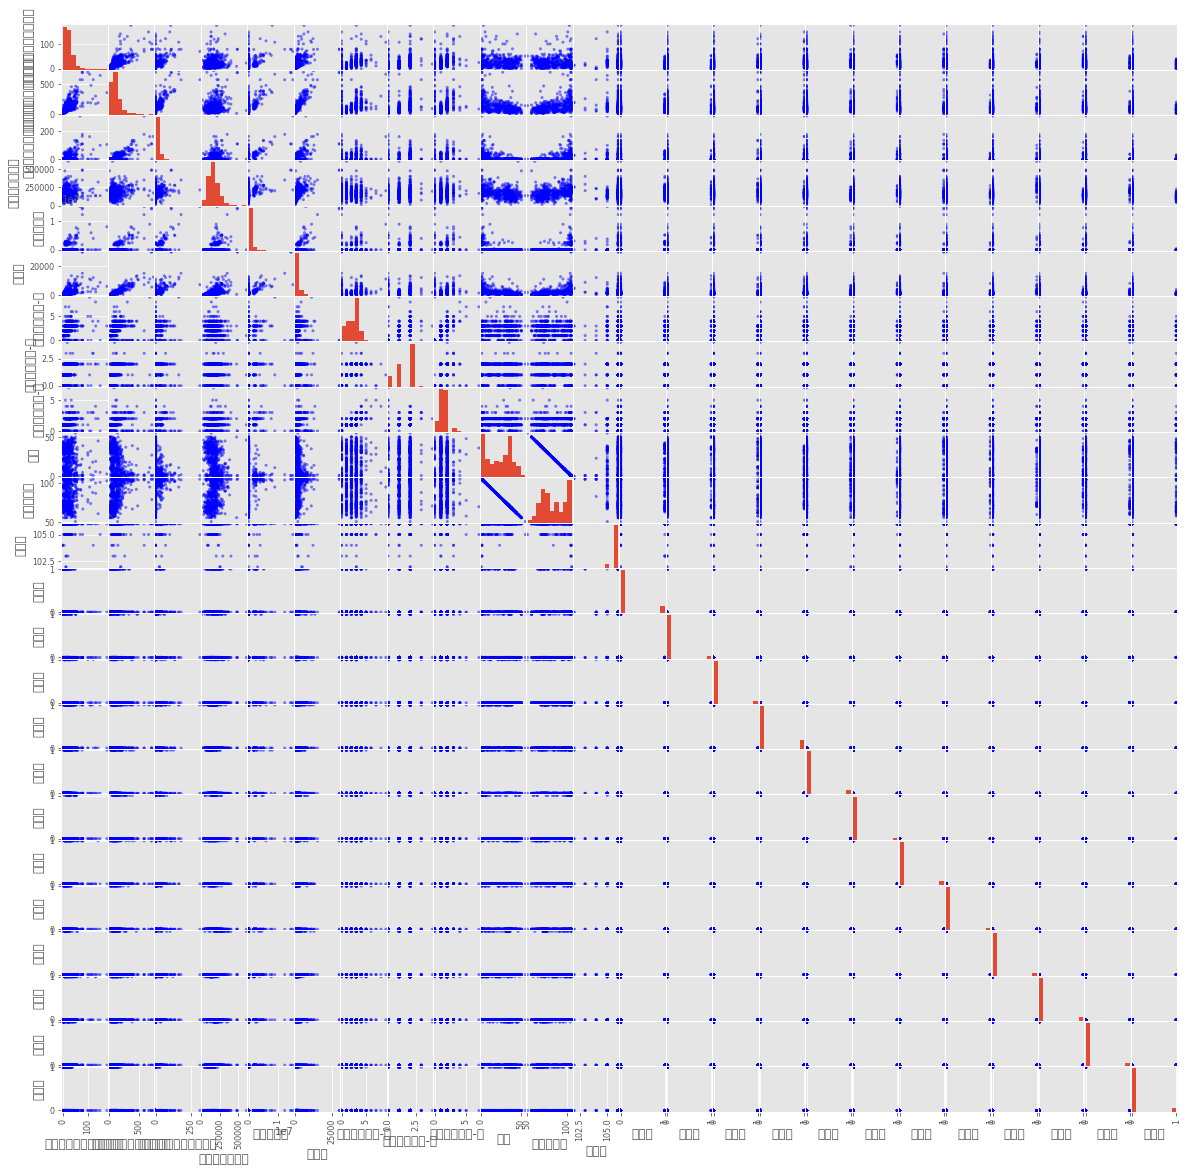

In [15]:
plt.rcParams['font.family']='sans-serif'   
plt.rcParams['axes.unicode_minus']=False

from pandas.plotting import scatter_matrix
scatter_matrix(df_ml, figsize=(20, 20), color='b')

In [18]:
#再一次描述統計

# train, test data (full data)

In [19]:
#刪除'鄉鎮市區'及不必要的欄位, 留下one-hot encoding項

df_m3 = df_ml.drop(['鄉鎮市區','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','建築完成年','交易年','屋齡'], axis=1)
df_m3.head()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積平方公尺,車位總價元,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,6.34,55.19,0.00,0,1290.0,0,0,0,0,0,0,0,1,0,0,0,0
1,4.96,38.79,0.00,0,430.0,0,0,0,1,0,0,0,0,0,0,0,0
2,13.72,149.24,12.96,0,2400.0,0,0,0,1,0,0,0,0,0,0,0,0
3,22.45,136.20,34.60,0,2030.0,0,0,0,1,0,0,0,0,0,0,0,0
4,33.51,242.78,51.07,0,4788.0,0,0,0,1,0,0,0,0,0,0,0,0


In [74]:
from sklearn.model_selection import train_test_split   #sklearn.cross_validation

X= df_m3.drop('總價元', axis=1)   #資料數不夠多,也用full data做做看
y= df_m3[['總價元']]   #令y總價元欄為df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)  #30%測試, 可先檢查分配
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(640, 16) (640, 1) (448, 16) (448, 1) (192, 16) (192, 1)


In [21]:
#若y為df, y.values為二維, y.values.ravel()壓成一維; 若y為Series,y.values為一維
y.values.ravel()

array([ 1290.    ,   430.    ,  2400.    ,  2030.    ,  4788.    ,
        1228.    ,  1380.    ,  2150.    ,  2388.    ,  2750.    ,
        2820.    ,  1300.    ,  1310.    ,  1950.    ,   908.    ,
        2658.    ,  4212.    ,  4288.    ,  1150.    ,  1266.    ,
        1240.    ,  1266.    ,  4775.    ,  8855.    ,  2450.    ,
        1225.    ,  1468.    ,   750.    ,   915.    ,  1450.    ,
        1850.    ,  1375.    ,  2000.    ,  1068.    ,  4330.    ,
        2960.    ,  1320.    ,  2050.    ,  1110.    ,  1856.    ,
         838.    ,   838.    ,  1100.    ,  2300.    ,  1800.    ,
        1620.    ,   788.4   ,   488.4   ,  1340.4   ,   980.    ,
        1000.    ,   484.    ,   925.    ,  1500.    , 10500.    ,
        6500.    ,  1000.    , 12874.    ,  1500.    ,  7320.    ,
        1350.    ,  1170.    ,  1050.    ,  3160.    ,  3700.    ,
        1060.    ,  2228.    ,  1168.    ,  4200.    ,   183.    ,
         411.23  ,  2480.    ,  2450.    ,  3000.    ,  6080. 

# LinearRegression  - def 1

In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np

def linear_regression(ind, dep):
    regr = linear_model.LinearRegression()  #new LR物件
    regr.fit(ind, dep) #開始預測
    print('截距:', regr.intercept_)
    print('係數:', regr.coef_)   #取出各個鄉鎮市區的係數(共12個),代入迴歸式中
    print("MSE: %.2f" % np.mean((regr.predict(ind) - dep) ** 2))
    print("R Square:", regr.score(ind, dep))

In [34]:
#Full data預測
linear_regression(X, y)  
#regr.coef_[0][4:15]  

截距: [-289.60605574]
係數: [[-1.34246179e+01  2.27854966e+01 -2.06355040e+01  5.20665598e-04
   3.73788961e+01  1.42918201e+02  3.58184819e+01 -2.40322135e+02
  -4.37332788e+02 -1.83692360e+02  4.23360714e+02 -3.22078366e+02
   1.05921025e+03 -3.82857295e+02  1.81225449e+02 -3.13629049e+02]]
MSE: 1230981.50
R Square: 0.8209026991432419


In [32]:
#train data預測
linear_regression(X_train, y_train) 
#regr.coef_[0][4:15]

截距: [-189.93290405]
係數: [[-1.18599950e+01  2.10216081e+01 -1.37443608e+01  5.42793586e-04
  -2.49384279e+01  2.34917083e+02  1.47599142e+01 -5.43583937e+01
  -4.32025943e+02 -2.51910175e+02  3.72905643e+02 -3.73560412e+02
   9.43721751e+02 -3.80993688e+02  2.84846293e+02 -3.33363646e+02]]
MSE: 1079106.37
R Square: 0.8242097998188868


In [36]:
#test data預測
linear_regression(X_test, y_test) 
#regr.coef_[0][4:15]

截距: [-503.18074089]
係數: [[-1.94583794e+01  2.67276270e+01 -3.11854966e+01  5.15262311e-04
   1.17048976e+02 -4.98426582e+01  1.70267558e+02 -7.30627655e+02
  -5.32525183e+02 -8.99352907e+01  5.17435665e+02 -2.18606709e+02
   1.39430313e+03 -4.12173385e+02  2.27217111e+01 -1.88066162e+02]]
MSE: 1421990.67
R Square: 0.8341953898885893


### KFold - def (可直接整合在上面)

In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def sklearn_KFold(ind, dep):  #def命名不跟下面的KFold funs重複
    cv = KFold(n_splits=10, random_state=None, shuffle=True)
    estimator = LinearRegression()
    #官網有作圖參數(先執行最下方的code)               #放進X,y資料
    plot_learning_curve(estimator, "LinearRegression", ind, dep, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
    scores = cross_val_score(estimator, ind, dep, cv=5, scoring='r2')
    np.mean(scores)  
    #scores = cross_val_score(lr, X_std, y, cv=5, scoring='neg_mean_squared_error') loss
    #np.mean(scores*-1)

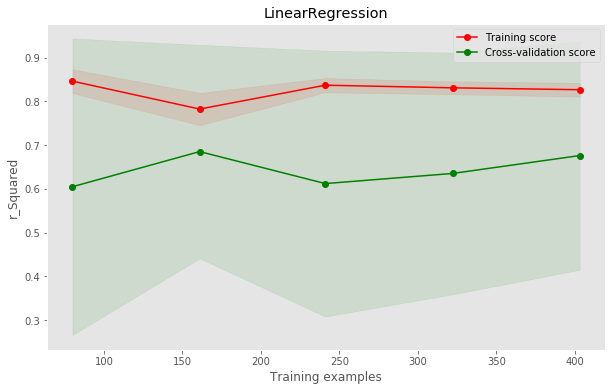

In [47]:
#三組資料都看一下KFold結果
#sklearn_KFold(X, y)
sklearn_KFold(X_train, y_train)
#sklearn_KFold(X_test, y_test)

# LinearRegression  - def 2

In [48]:
#留下'鄉鎮市區', 刪除one-hot encoding項

df_m4 = df_ml.drop(['單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','建築完成年','交易年','屋齡','中山區', '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
                   '萬華區'], axis=1)
df_m4.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積平方公尺,車位總價元,總價元
0,大同區,6.34,55.19,0.00,0,1290.0
1,內湖區,4.96,38.79,0.00,0,430.0
2,內湖區,13.72,149.24,12.96,0,2400.0
3,內湖區,22.45,136.20,34.60,0,2030.0
4,內湖區,33.51,242.78,51.07,0,4788.0


In [49]:
from sklearn.model_selection import train_test_split  

X = df_m4.drop('總價元', axis=1)
y = df_m4[['鄉鎮市區','總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)  
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(640, 5) (640, 2) (448, 5) (448, 2) (192, 5) (192, 2)


In [50]:
X.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,車位移轉總面積平方公尺,車位總價元
0,大同區,6.34,55.19,0.00,0
1,內湖區,4.96,38.79,0.00,0
2,內湖區,13.72,149.24,12.96,0
3,內湖區,22.45,136.20,34.60,0
4,內湖區,33.51,242.78,51.07,0


In [51]:
y.head()

,鄉鎮市區,總價元
0,大同區,1290.0
1,內湖區,430.0
2,內湖區,2400.0
3,內湖區,2030.0
4,內湖區,4788.0


In [59]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def lr_region_plot(ind, dep):
    for region in ['中山區', '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區','萬華區']:
        #計算各區metric
        xa = ind[ind['鄉鎮市區']== region].reset_index(drop=True)
        ya = dep[dep['鄉鎮市區']== region].reset_index(drop=True)
        regr = linear_model.LinearRegression()
        regr.fit(xa[xa.columns[1:5]], ya[ya.columns[1]])
        #印出各區metric
        print('*******************************************')
        print('鄉鎮市區:', region)        
        print('截距:', regr.intercept_)
        print('係數:', regr.coef_)   
        print("MSE: %.2f" % np.mean((regr.predict(xa[xa.columns[1:5]]) - ya[ya.columns[1]]) ** 2))
        print("R Square:", regr.score(xa[xa.columns[1:5]], ya[ya.columns[1]]))  #或創[]把各區解釋量存起來
        #印出各區plot
        plt.style.use('ggplot')
        plt.plot(xa[xa.columns[1:5]], regr.predict(xa[xa.columns[1:5]]), color='blue', linewidth=1)   
        plt.xticks([i for i in range(len(ind))])
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()

*******************************************
鄉鎮市區: 中山區
截距: -493.0637664109404
係數: [-4.77154108e+00  2.48594354e+01 -9.57692415e+00  1.50986022e-04]
MSE: 411406.70
R Square: 0.8921528235935777


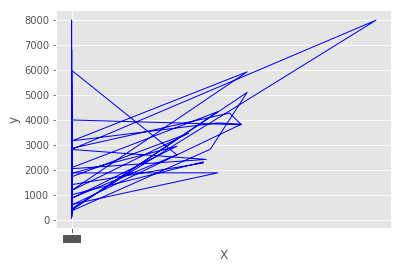

*******************************************
鄉鎮市區: 中正區
截距: -406.89121189415255
係數: [-1.39353077e+01  2.39276703e+01  2.09337717e+00  4.88393416e-04]
MSE: 822313.60
R Square: 0.9063210858105312


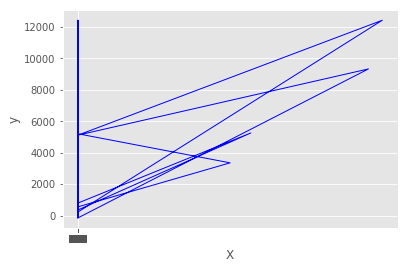

*******************************************
鄉鎮市區: 信義區
截距: 279.89362302308746
係數: [ 1.98713660e+01  9.28318218e+00  7.27189932e+01 -1.18015819e-03]
MSE: 1246455.07
R Square: 0.8247116914699213


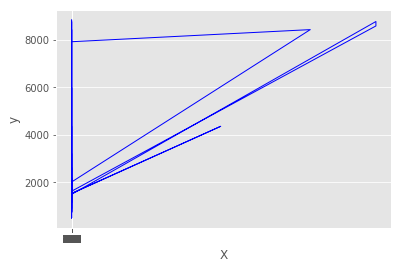

*******************************************
鄉鎮市區: 內湖區
截距: -192.40398616893708
係數: [-6.19828595e+00  1.95448385e+01 -1.12553111e+01  5.40950121e-05]
MSE: 671491.44
R Square: 0.8685227990455098


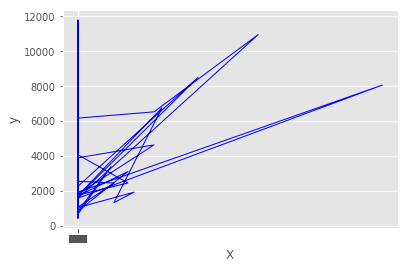

*******************************************
鄉鎮市區: 北投區
截距: -261.45794310177985
係數: [-8.48302619e+00  1.79889726e+01 -4.75230540e+00  1.94632789e-04]
MSE: 309196.48
R Square: 0.8849722158366292


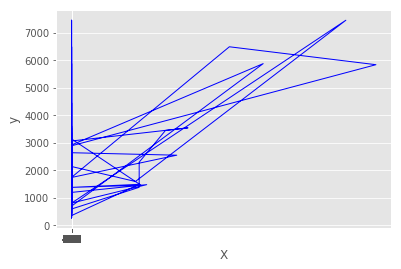

*******************************************
鄉鎮市區: 南港區
截距: -363.3728208174498
係數: [-3.26686085e+01  2.77160531e+01 -2.73629968e+01  2.16858625e-04]
MSE: 514169.70
R Square: 0.8817762492704033


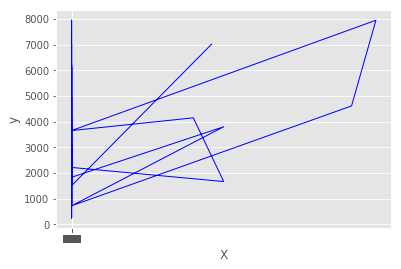

*******************************************
鄉鎮市區: 士林區
截距: -1436.408347017773
係數: [-1.36593398e+01  3.43990601e+01 -4.37695010e+01  7.45869240e-04]
MSE: 1766940.94
R Square: 0.946775604157924


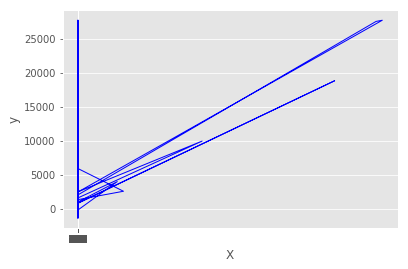

*******************************************
鄉鎮市區: 大同區
截距: -32.597642358861776
係數: [7.07522005e+00 1.12421721e+01 1.62643027e+01 8.18470547e-04]
MSE: 542962.15
R Square: 0.7786952234833893


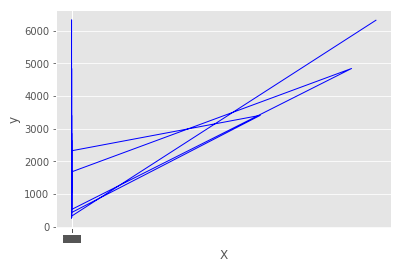

*******************************************
鄉鎮市區: 大安區
截距: -640.3102265161397
係數: [-1.67566719e+01  3.44808609e+01 -1.46840772e+01  3.22375004e-04]
MSE: 745475.83
R Square: 0.8927265068898568


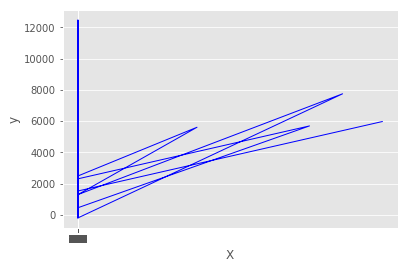

*******************************************
鄉鎮市區: 文山區
截距: 124.99255507470025
係數: [1.71654431e+00 1.13806307e+01 4.56970918e+00 1.06341992e-04]
MSE: 124865.79
R Square: 0.8863894614530536


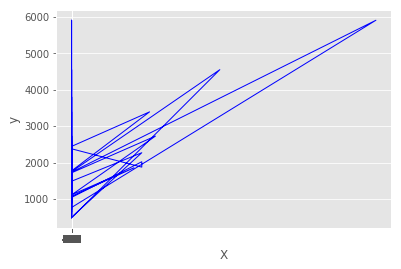

*******************************************
鄉鎮市區: 松山區
截距: -128.7905964532256
係數: [ 4.63269383e+00  2.00706210e+01 -1.46510879e+01  1.01811861e-04]
MSE: 209383.96
R Square: 0.8985535857283113


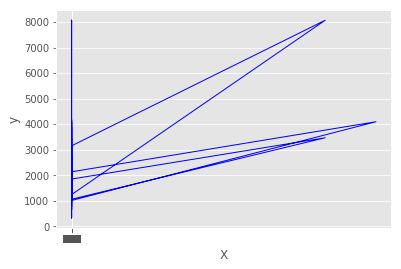

*******************************************
鄉鎮市區: 萬華區
截距: 5.025145379053924
係數: [-6.12334236e+00  1.29085800e+01  4.02701986e+01 -2.90659083e-03]
MSE: 82672.89
R Square: 0.8476678899475185


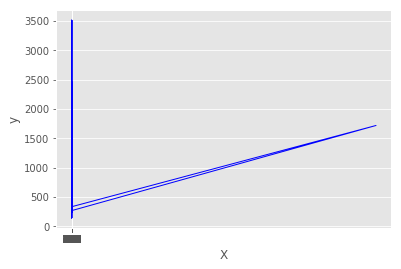

*******************************************
鄉鎮市區: 中山區
截距: -480.743290117731
係數: [-8.90253344e+00  2.53294931e+01 -2.17875913e+01  3.22004373e-04]
MSE: 489978.14
R Square: 0.8639642011130402


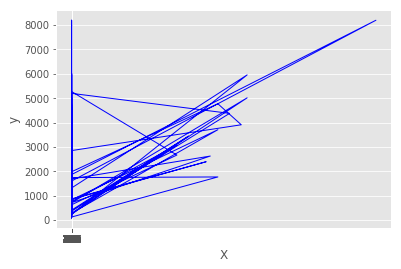

*******************************************
鄉鎮市區: 中正區
截距: -343.8177822407779
係數: [-2.32966033e+01  2.50410018e+01  6.06990551e+00  3.19437396e-05]
MSE: 646055.60
R Square: 0.8924637512059128


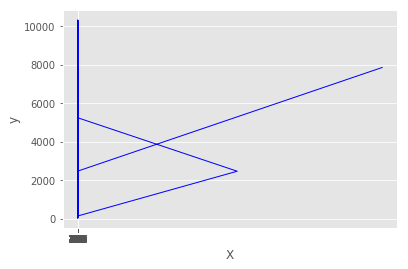

*******************************************
鄉鎮市區: 信義區
截距: 114.86660797377999
係數: [ 2.89521360e+01  8.14293956e+00  7.84738304e+01 -1.31806378e-03]
MSE: 1845478.28
R Square: 0.8123694430408808


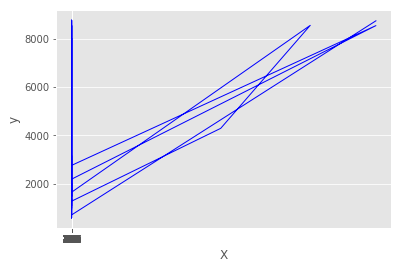

*******************************************
鄉鎮市區: 內湖區
截距: -217.88588509084911
係數: [-3.57631016e+00  1.86632116e+01 -7.97747796e-01 -8.61117164e-05]
MSE: 525408.67
R Square: 0.8347115302397885


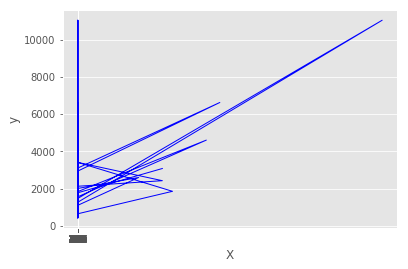

*******************************************
鄉鎮市區: 北投區
截距: -177.64247978708704
係數: [-1.44414209e+01  1.90476015e+01 -9.61733758e+00  3.30414005e-04]
MSE: 265097.89
R Square: 0.899682845465011


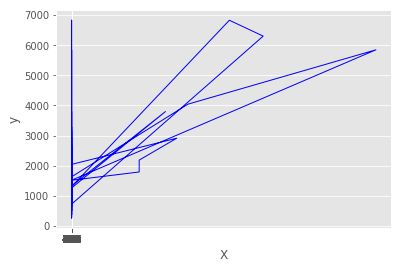

*******************************************
鄉鎮市區: 南港區
截距: -128.71851097785793
係數: [-3.05645374e+01  2.43629940e+01 -1.92487335e+01  2.97998686e-04]
MSE: 361517.74
R Square: 0.7980788272894933


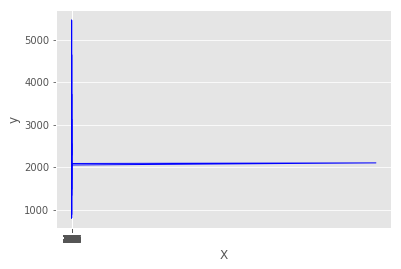

*******************************************
鄉鎮市區: 士林區
截距: -339.92866067850673
係數: [1.60901762e+01 1.41220193e+01 1.11691977e+01 1.20293403e-03]
MSE: 645101.46
R Square: 0.9697832059855981


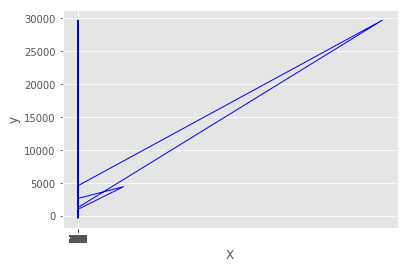

*******************************************
鄉鎮市區: 大同區
截距: 348.0167664736714
係數: [2.33233844e+01 4.58974958e+00 2.93715340e+01 6.78944682e-04]
MSE: 308239.66
R Square: 0.6397096674877861


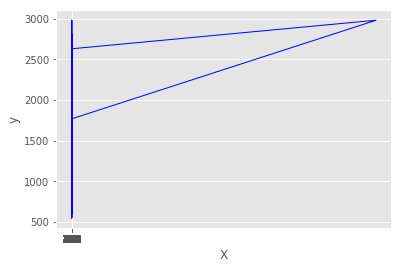

*******************************************
鄉鎮市區: 大安區
截距: -193.65830726243576
係數: [-1.16379608e+01  2.85213528e+01  1.24199139e+00  4.11531139e-04]
MSE: 233682.25
R Square: 0.966655526633863


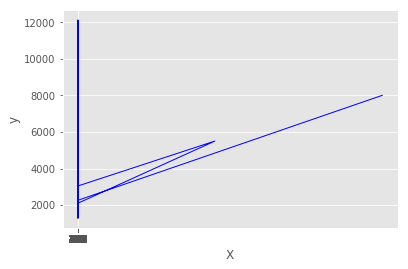

*******************************************
鄉鎮市區: 文山區
截距: 136.39204977293002
係數: [8.60099288e-03 1.21389794e+01 1.68512503e+00 1.22613488e-04]
MSE: 114761.64
R Square: 0.8984401296340778


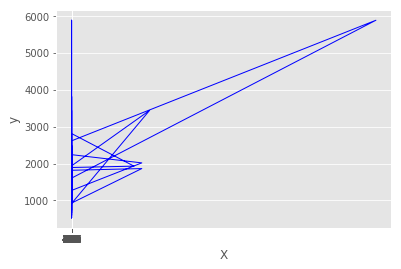

*******************************************
鄉鎮市區: 松山區
截距: -30.517057869382143
係數: [ 4.77880910e+00  1.80486036e+01 -4.78243973e+01  4.29843965e-04]
MSE: 216848.79
R Square: 0.9163208014122528


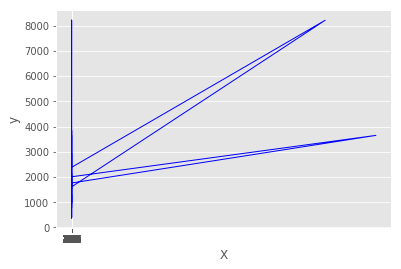

*******************************************
鄉鎮市區: 萬華區
截距: -47.72432550311953
係數: [-15.60408579  15.63946744  32.11620872   0.        ]
MSE: 61529.75
R Square: 0.904370822412663


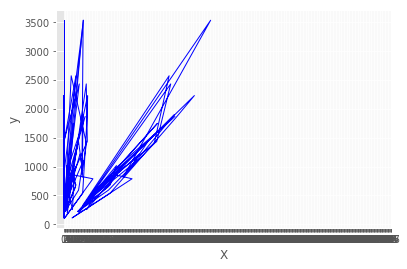

*******************************************
鄉鎮市區: 中山區
截距: -332.00863395890565
係數: [6.66983511e+00 2.12793255e+01 7.43739780e+00 6.84764106e-05]
MSE: 66724.14
R Square: 0.9849960150434843


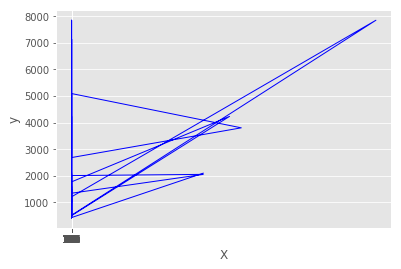

*******************************************
鄉鎮市區: 中正區
截距: 155.5459156079819
係數: [-2.46071758e+01  1.52924505e+01 -2.41584603e+01  1.96039839e-03]
MSE: 370967.38
R Square: 0.9787890613129571


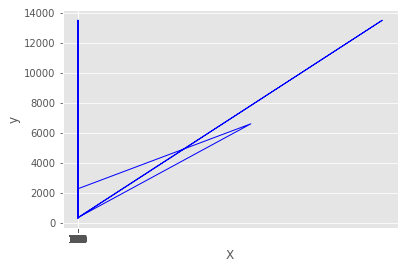

*******************************************
鄉鎮市區: 信義區
截距: 484.33349387773274
係數: [-16.79548551  15.40213497  74.130999     0.        ]
MSE: 230252.18
R Square: 0.8584876227582625


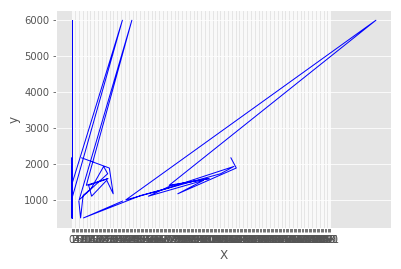

*******************************************
鄉鎮市區: 內湖區
截距: -202.3576625086307
係數: [-8.20434252e+00  2.02834107e+01 -1.59103614e+01  1.18714390e-04]
MSE: 940376.79
R Square: 0.8940456774490873


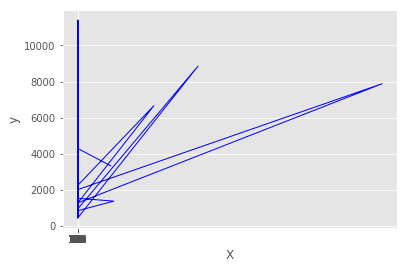

*******************************************
鄉鎮市區: 北投區
截距: -697.8275664169323
係數: [ 2.84680427e+01  1.17971797e+01  2.48947719e+01 -2.89916786e-04]
MSE: 157928.27
R Square: 0.9430093929846126


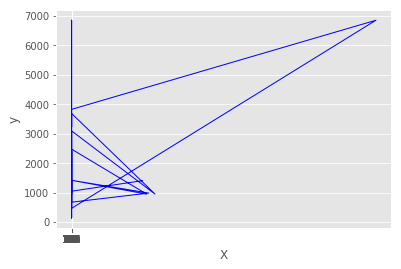

*******************************************
鄉鎮市區: 南港區
截距: -77.57835660155934
係數: [-4.49033002e+01  3.16487312e+01 -2.06259580e+02  2.19774983e-03]
MSE: 504155.69
R Square: 0.9322149109066967


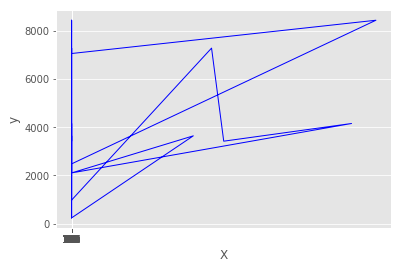

*******************************************
鄉鎮市區: 士林區
截距: -2650.1444712315015
係數: [-3.50543932e+01  5.12002429e+01 -9.55489963e+01  6.35561694e-04]
MSE: 1275390.65
R Square: 0.9810949005875808


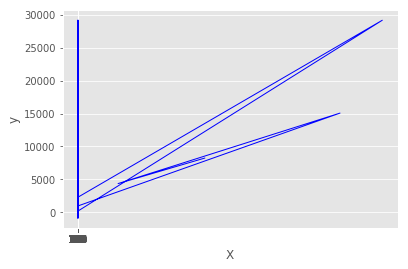

*******************************************
鄉鎮市區: 大同區
截距: -1351.1791883858896
係數: [ 3.79936608e+00  2.66814514e+01 -1.93365459e+01  3.30455342e-04]
MSE: 325562.78
R Square: 0.937541810044566


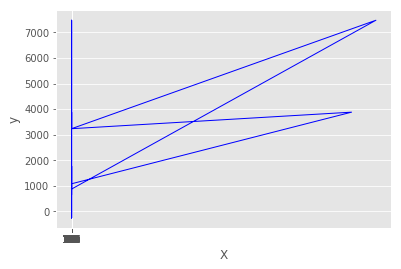

*******************************************
鄉鎮市區: 大安區
截距: -822.8107505421299
係數: [-2.10484443e+01  3.80667591e+01 -2.18625183e+01  2.61225799e-04]
MSE: 1383067.91
R Square: 0.795859703291264


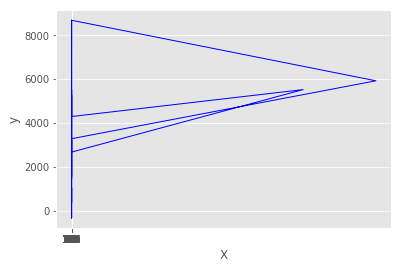

*******************************************
鄉鎮市區: 文山區
截距: 208.3056908498561
係數: [7.12368093e+00 7.92623265e+00 1.77965083e+01 4.42145659e-05]
MSE: 124846.92
R Square: 0.8720208980116881


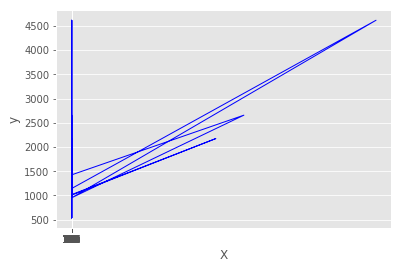

*******************************************
鄉鎮市區: 松山區
截距: -177.2408641587317
係數: [-9.47527102e-01  2.28754260e+01 -1.71336610e-09 -1.13198054e-04]
MSE: 141466.85
R Square: 0.8799021610285428


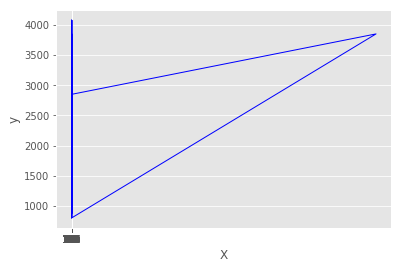

*******************************************
鄉鎮市區: 萬華區
截距: 76.20808629087117
係數: [8.49883512e+00 8.51759933e+00 5.94385465e-09 8.21128966e-05]
MSE: 103031.62
R Square: 0.6062175373630581


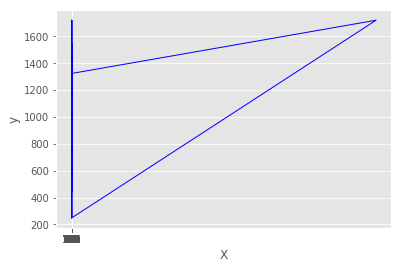

In [60]:
lr_region_plot(X, y)
lr_region_plot(X_train, y_train)
lr_region_plot(X_test, y_test)

# MLP with keras framework

In [64]:
#ML可得到不錯的模型, MLP可省

In [141]:
from sklearn.model_selection import train_test_split   #sklearn.cross_validation

X= df_m3.drop('總價元', axis=1)   #資料數不夠多,也用full data做做看
y= df_m3[['總價元']]   #令y總價元欄為df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [142]:
#使用Keras框架定義MLP的model.compile metric
import keras.backend as K

def r_squared(y_true, y_pred):
    SS_res = K.sum((y_true - y_pred)**2) 
    SS_tot = K.sum((y_true - K.mean(y_true))**2) 
    return (1 - SS_res/SS_tot)

### model

In [143]:
from keras.models import Sequential
from keras.layers import Dense

#產生Sequential Model
model = Sequential()
#增加一層:(hidden), weights為常態分配, activation function為ReLU
model.add(Dense(30, input_dim=16, kernel_initializer='normal',activation='relu'))  #假設經過20個layers, 使用df_m3
#增加一層:(output), weights為常態分佈
model.add(Dense(1, kernel_initializer='normal'))
#建立模型: Loss function為MSE, optimizer為adam或設定更詳細參數 https://keras.io/optimizers/
model.compile(loss='mse', optimizer='adam',metrics=[r_squared]) #[]metric自己寫

### summary

In [144]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                510       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 31        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


### model fit

In [145]:
history = model.fit(X_train, y_train, epochs=200, batch_size=60, validation_split=0.2)  #用train data, 直接從這裡設定validation的比例, 各批量為20
history  #df_m3的X_train,y_train

Train on 409 samples, validate on 103 samples
Epoch 1/200
409/409 [==============================] - 0s 847us/step - loss: 7357443.4768 - r_squared: -0.9428 - val_loss: 8360317.3495 - val_r_squared: -0.6034
Epoch 2/200
409/409 [==============================] - 0s 77us/step - loss: 6525089.6284 - r_squared: -0.6383 - val_loss: 7659706.8981 - val_r_squared: -0.4621
Epoch 3/200
409/409 [==============================] - 0s 70us/step - loss: 6634331.0807 - r_squared: -0.6706 - val_loss: 7982947.8835 - val_r_squared: -0.5257
Epoch 4/200
409/409 [==============================] - 0s 39us/step - loss: 6452726.8509 - r_squared: -0.5790 - val_loss: 7919189.1311 - val_r_squared: -0.5128
Epoch 5/200
409/409 [==============================] - 0s 39us/step - loss: 6103135.4597 - r_squared: -0.5375 - val_loss: 7668759.1311 - val_r_squared: -0.4637
Epoch 6/200
409/409 [==============================] - 0s 49us/step - loss: 6006206.0024 - r_squared: -0.5662 - val_loss: 7897238.5485 - val_r_squared: -

409/409 [==============================] - 0s 55us/step - loss: 6657720.8093 - r_squared: -0.7143 - val_loss: 6986830.9709 - val_r_squared: -0.3270
Epoch 52/200
409/409 [==============================] - 0s 45us/step - loss: 6833026.7286 - r_squared: -1.0340 - val_loss: 7108286.1117 - val_r_squared: -0.3511
Epoch 53/200
409/409 [==============================] - 0s 59us/step - loss: 5800027.9083 - r_squared: -0.5230 - val_loss: 6946810.8301 - val_r_squared: -0.3189
Epoch 54/200
409/409 [==============================] - 0s 41us/step - loss: 5999267.8496 - r_squared: -0.4982 - val_loss: 6890244.7136 - val_r_squared: -0.3077
Epoch 55/200
409/409 [==============================] - 0s 47us/step - loss: 6977228.1834 - r_squared: -0.6926 - val_loss: 7430056.7524 - val_r_squared: -0.4178
Epoch 56/200
409/409 [==============================] - 0s 37us/step - loss: 7399690.3276 - r_squared: -1.1957 - val_loss: 6606601.1990 - val_r_squared: -0.2545
Epoch 57/200
409/409 [=========================

409/409 [==============================] - 0s 29us/step - loss: 3671242.0440 - r_squared: 0.0188 - val_loss: 4834255.0316 - val_r_squared: 0.1000
Epoch 103/200
409/409 [==============================] - 0s 29us/step - loss: 3612868.9658 - r_squared: 0.1002 - val_loss: 4747610.6286 - val_r_squared: 0.1170
Epoch 104/200
409/409 [==============================] - 0s 29us/step - loss: 3643466.3090 - r_squared: 0.0388 - val_loss: 4895647.2379 - val_r_squared: 0.0875
Epoch 105/200
409/409 [==============================] - 0s 29us/step - loss: 3486317.2604 - r_squared: 0.1350 - val_loss: 4821922.5850 - val_r_squared: 0.1021
Epoch 106/200
409/409 [==============================] - 0s 29us/step - loss: 3388853.7332 - r_squared: 0.1852 - val_loss: 4518189.7937 - val_r_squared: 0.1616
Epoch 107/200
409/409 [==============================] - 0s 20us/step - loss: 3611918.7005 - r_squared: 0.0708 - val_loss: 4544347.5194 - val_r_squared: 0.1570
Epoch 108/200
409/409 [==============================]

409/409 [==============================] - 0s 50us/step - loss: 3075897.7689 - r_squared: 0.2808 - val_loss: 3349648.7658 - val_r_squared: 0.3861
Epoch 154/200
409/409 [==============================] - 0s 49us/step - loss: 2732054.2573 - r_squared: 0.3485 - val_loss: 2974650.3944 - val_r_squared: 0.4621
Epoch 155/200
409/409 [==============================] - 0s 49us/step - loss: 2368596.1531 - r_squared: 0.4145 - val_loss: 2707270.3447 - val_r_squared: 0.5133
Epoch 156/200
409/409 [==============================] - 0s 20us/step - loss: 2064924.6412 - r_squared: 0.4495 - val_loss: 3039262.0874 - val_r_squared: 0.4486
Epoch 157/200
409/409 [==============================] - 0s 20us/step - loss: 2207443.8029 - r_squared: 0.4440 - val_loss: 3071563.5267 - val_r_squared: 0.4417
Epoch 158/200
409/409 [==============================] - 0s 20us/step - loss: 2055945.7653 - r_squared: 0.4774 - val_loss: 2767705.0752 - val_r_squared: 0.5022
Epoch 159/200
409/409 [==============================]

In [146]:
history.history.items()   #以dict形式查看key, 包括loss, val_loss, r_squared, val_r_squared

dict_items([('val_loss', [8360317.349514564, 7659706.898058252, 7982947.8834951455, 7919189.131067961, 7668759.131067961, 7897238.54854369, 7910171.941747573, 7833682.6262135925, 7892264.32038835, 7845645.291262136, 7942703.694174757, 7770075.150485436, 8242170.849514564, 7671905.8834951455, 7948336.8834951455, 7752861.713592233, 7634969.436893204, 8111044.480582524, 7445117.13592233, 8176190.296116505, 7511448.90776699, 8277868.009708738, 7550527.208737864, 7638099.32038835, 7889670.441747573, 7567448.980582524, 7549201.13592233, 7664990.922330097, 7656060.990291262, 7613638.834951457, 7762486.033980583, 7576094.708737864, 7509597.932038835, 7656743.490291262, 7538641.252427184, 7392287.40776699, 7762807.6165048545, 7387902.349514564, 7459491.72815534, 7455279.169902912, 7529743.09223301, 7404464.101941748, 7311754.024271845, 7351631.703883495, 7357954.014563107, 7219500.160194174, 7103513.199029126, 7479101.67961165, 6919918.208737864, 7673708.684466019, 6986830.970873786, 7108286.11

In [147]:
#history.history.get('loss')  #一一取出每個key中的值
#history.history.get('val_loss')
history.history.get('r_squared')
#history.history.get('val_r_squared')

[-0.9428457033371868,
 -0.6383044783818401,
 -0.6705745604335533,
 -0.5790225127506956,
 -0.5374897161730927,
 -0.5661820590058866,
 -0.5866470517622521,
 -0.6464104588282429,
 -0.5314237584694673,
 -0.6949342480498596,
 -0.6098886573810157,
 -0.6462868414181661,
 -0.6691493303093758,
 -0.692207699882955,
 -0.46738780973010075,
 -0.5309963759699777,
 -0.5749976582515502,
 -0.6676430262096936,
 -0.5191419698789825,
 -0.47670447097722357,
 -0.48574145848710265,
 -0.6045099759160161,
 -0.654036269794175,
 -0.4976340960756782,
 -0.5976593949101082,
 -0.602059410370358,
 -0.5336617554895452,
 -0.48225408107552376,
 -0.43094182072758386,
 -0.5634682571975409,
 -0.6476407464967089,
 -0.4534615489556329,
 -0.7489185671351649,
 -0.5382711216989531,
 -0.4972461357093382,
 -0.48531908656682243,
 -0.604260146763622,
 -0.7053051015275614,
 -0.4194821101820556,
 -0.42615730342771724,
 -0.5765775514989727,
 -0.3312781040709293,
 -0.48213596011723747,
 -0.40348935477016606,
 -0.37140167546447156,
 -0.

### Plot (metrics) 

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

def  MLP_history_plot(history, train_metric, val_metric):
    r2 = history.history.get(train_metric)
    val_r2 = history.history.get(val_metric)
    x = [i for i in range(len(r2))]
    #設定作圖位置,也可以畫在一起
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(x, r2, label='r2', color='green')
    plt.ylabel('Score(r2)')
    plt.subplot(1,2,2)
    plt.plot(x, val_r2, label='val_r2', color='orange')
    plt.ylabel('val_Score(r2)')
    plt.legend()
    plt.show()

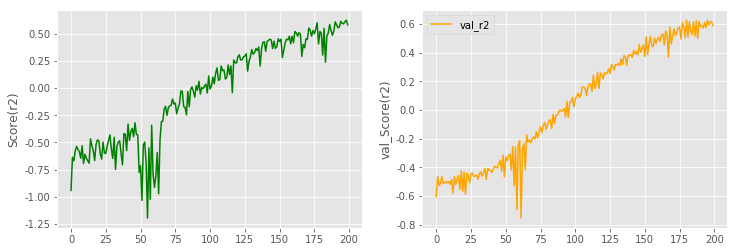

In [153]:
MLP_history_plot(history, 'r_squared', 'val_r_squared')

### model evaluate

In [154]:
model.evaluate(X_train, y_train, batch_size=60)

512/512 [==============================] - 0s 0us/step


[1766599.9013671875, 0.5913399779237807]

### def MLP_model()

In [ ]:
#大量資料時可設定def參數處理分層數或分批數等

def MLP_model(num_1, num_2, num_3.....):  
    model = Sequential()
    model.add(Dense(num_2, input_dim=num_1, kernel_initializer='normal',activation='relu'))  #輸入與處理層
    model.add(Dense(num_3, kernel_initializer='normal'))  #輸出層
    model.compile(loss='mse', optimizer='adam',metrics=[r_squared]) 
    history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_split=0.2) #設定各批中的數目,也可設為參數
    return history

### Keras + Kfold (可直接整合在上面)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KerasRegressor(build_fn=MLP_model, nb_epoch=10, batch_size=10)  #keras  MLP_model物件(代入def)
plot_learning_curve(estimator, "MLP with Keras", X_train, y_train, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
#scores = cross_val_score(lr, X_std, y, cv=5, scoring='neg_mean_squared_error')
#np.mean(scores*-1)
scores = cross_val_score(lr, X_std, y, cv=5, scoring='r2')
np.mean(scores)

In [42]:
#備註
#Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("r_Squared")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment
